In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
import random
from scipy.integrate import odeint


Rabbits vs. Sheep

$x' = x (3-x-2y)$

$y' = y (2-x-y)$
    

In [32]:
def Jacobean(X):
    J =np.array([[3-2*X[0] - 2*X[1], -2*X[0]],
                 [-X[1], 2-X[0]-2*X[1]]])
    return J


What are the null clines?
$$0 = x (3-x-2y)$$ 
$$0 = xy (2-x-y)$$
So we have null clines at $$y=0 ;x = 0 ; y = \frac{3}{2} - \frac{x}{2} ; y = x-2$$

Giving us fixed points at : (0,0), (3,0), (1, 1), (0,2)
To determine stability, we can look at the Jacobean at each point

In [39]:
for P in [(0,0), (3,0), (1, 1), (0,2)]:
    J = Jacobean(P)
    e1, e2 = np.linalg.eig(J)[0]
    
    if e1.real == 0 and e2.real == 0:
        print('The fixed point at {} is a stable orbit'.format(P))
    
    elif e1 < 0 and e2 < 0:
        print('The fixed point at {} is a sink'.format(P))
    elif e1 < 0 or e2 < 0:
        print('The fixed point at {} is a saddle'.format(P))
    elif e1 > 0 and e2 > 0:
        print('The fixed point at {} is a source'.format(P))
    

The fixed point at (0, 0) is a source
The fixed point at (3, 0) is a sink
The fixed point at (1, 1) is a saddle
The fixed point at (0, 2) is a sink


Finally, we can plot some vectors around these fixed points

(-3, 3)

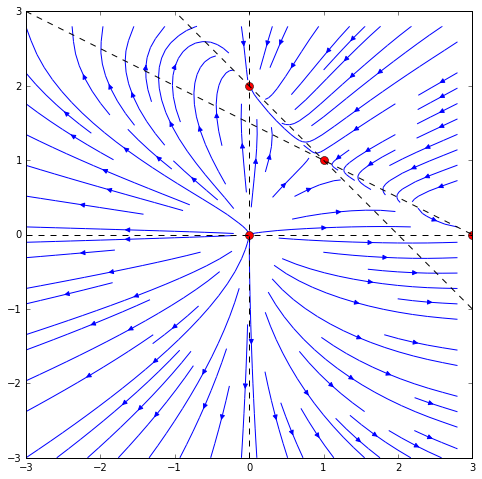

In [44]:
x,y = np.meshgrid(np.arange(-3,3,0.2), np.arange(-3,3,0.2))
U = x * (3-x - 2*y)
V = y * (2-x-y)
plt.figure(figsize=(8,8))
plt.streamplot(x,y,U,V)
#And the fixed points
plt.plot([0,3,1,0], [0,0,1,2], 'ro', markersize=8)
#And some nullclines, why not
plt.plot([-3,3], [0,0], 'k--') #y = 0
plt.plot([0,0], [-3,3], 'k--') #x = 0
plt.plot([-3,3], [2+3,2-3], 'k--') #y=2-x
plt.plot([-3,3], [3, 0], 'k--') #2y = 3-x
plt.xlim(-3,3)
plt.ylim(-3,3)